# Part 1 Linear regression Full dataset


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zuucrew.csv')
df.head()



,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [3]:
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [ ]:
X = df[['EducationLevel', 'Attendance', 'TotalHours', 'AssignmentsCompleted', 
        'HackathonParticipation', 'GitHubScore', 'PeerReviewScore']].values   
y = df["CapstoneScore"].values

y = y.reshape(-1, 1)  

# Feature scaling (standardization)
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias column (for beta)
X_with_bias = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

In [6]:
def compute_cost(X, y, beta):
    m = len(y)
    y_pred = np.dot(X, beta)
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)
    return cost

In [7]:
def compute_gradients(X, y, beta):
    m = len(y)
    y_pred = np.dot(X, beta)
    gradients = (1/m) * np.dot(X.T, (y_pred - y))
    return gradients
    

In [8]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    
    beta = np.zeros((n, 1))   
    cost_history = []

    for i in range(iterations):
        gradient_beta = compute_gradients(X, y, beta)
        beta -= learning_rate * gradient_beta
        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: beta = {beta}, cost = {cost}, learning_rate = {learning_rate}")

    print(f"Final beta: {beta}, Final cost: {cost}")
    plt.plot(range(iterations), cost_history, color='red')
    plt.xlabel("Iterations")
    plt.ylabel("Cost (MSE)")
    plt.title(f"Convergence of Gradient Descent (lr={learning_rate})")
    plt.show()

    return beta, cost_history

Iteration 0: beta = [[ 0.55108333]
 [-0.01725349]
 [ 0.00672902]
 [ 0.16150418]
 [ 0.02676425]
 [-0.0187457 ]
 [ 0.02093705]
 [ 0.0164898 ]], cost = 1628.3066391346113, learning_rate = 0.01
Iteration 100: beta = [[35.13861538]
 [-0.63426214]
 [ 0.43400527]
 [10.1082219 ]
 [ 0.90593554]
 [-0.59988179]
 [ 0.88619001]
 [ 1.15351065]], cost = 227.15446379120948, learning_rate = 0.01
Iteration 200: beta = [[47.79877072]
 [-0.53576774]
 [ 0.59917706]
 [13.73373015]
 [ 0.59454459]
 [-0.33414794]
 [ 0.93230212]
 [ 1.56215929]], cost = 39.960004149564995, learning_rate = 0.01
Iteration 300: beta = [[52.43279702]
 [-0.4214627 ]
 [ 0.67014273]
 [15.13320783]
 [ 0.25728355]
 [-0.06198981]
 [ 0.91113471]
 [ 1.65975983]], cost = 14.517410478142933, learning_rate = 0.01
Iteration 400: beta = [[ 5.41290005e+01]
 [-3.65061934e-01]
 [ 7.04625043e-01]
 [ 1.56985379e+01]
 [ 4.20198281e-02]
 [ 1.12457857e-01]
 [ 9.11219826e-01]
 [ 1.66019366e+00]], cost = 10.995810324399752, learning_rate = 0.01
Iteration 

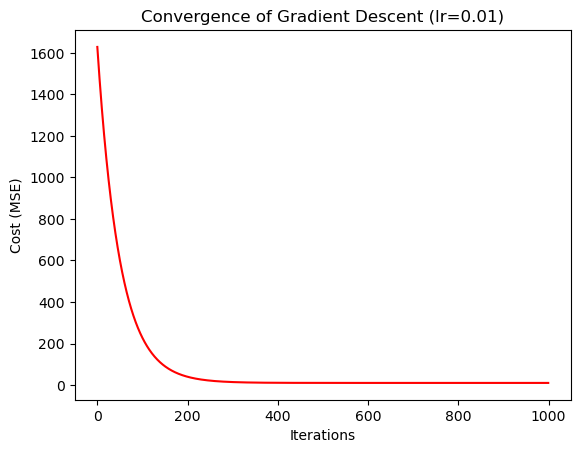

Final coefficients (beta): [[55.10595424]
 [-0.34980144]
 [ 0.74202501]
 [16.11631341]
 [-0.21436966]
 [ 0.3270342 ]
 [ 0.96585011]
 [ 1.60317626]]


In [9]:
final_beta, cost_history = gradient_descent(X_with_bias, y, learning_rate=0.01, iterations=1000)
print("Final coefficients (beta):", final_beta)

In [10]:
def predict(X_bias, final_beta):
    return np.dot(X_bias, final_beta)

In [11]:
# plt.figure(figsize=(12, 7))
# plt.scatter(X[:, 1], y, color='blue', s=50, label='Data Points')
# plt.plot(X, predict(X, final_beta),color='red', linewidth=2, label='Regression Line')
# plt.title('Linear Regression Fit')
# plt.xlabel('Total Hours (Standardized)')
# plt.ylabel('Capstone Score')
# plt.show()

In [12]:
y_pred = predict(X_with_bias, final_beta)
print("Predicted values:", y_pred)
# plt.scatter(y, y_hat, color='green', s=50)        

Predicted values: [[49.96602342]
 [79.2937021 ]
 [68.47702451]
 [36.56417099]
 [71.05213741]
 [82.30480966]
 [38.24937716]
 [56.2297886 ]
 [48.82176274]
 [45.57491416]
 [59.96439406]
 [36.71801629]
 [39.52743098]
 [49.96353269]
 [56.82316243]
 [30.83694772]
 [83.75338438]
 [28.99787003]
 [52.48136958]
 [75.82672303]
 [64.95341223]
 [42.13214434]
 [34.64159652]
 [79.91404446]
 [79.33070164]
 [36.87390038]
 [44.72252874]
 [43.12083623]
 [49.58128188]
 [38.67067774]
 [78.49606216]
 [39.95576554]
 [28.16617041]
 [61.44088295]
 [65.93519848]
 [68.14407733]
 [29.3897105 ]
 [42.32958419]
 [32.58448861]
 [61.16589154]
 [62.67449792]
 [70.36036457]
 [56.34017334]
 [70.2912756 ]
 [54.57903823]
 [57.15374176]
 [51.88375637]
 [32.90787797]
 [59.5770849 ]
 [43.65920255]
 [77.67782535]
 [39.4702393 ]
 [50.91107303]
 [76.61651452]
 [60.55829113]
 [78.91560359]
 [75.19560395]
 [58.44405647]
 [70.87842185]
 [72.63088833]
 [26.90327481]
 [51.79710607]
 [47.82067189]
 [79.68669266]
 [44.56660249]
 [56.54

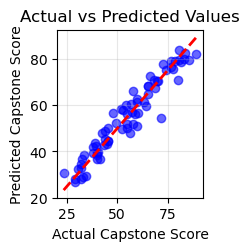

In [13]:
plt.subplot(2, 3, 1)
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Capstone Score')
plt.ylabel('Predicted Capstone Score')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

## Evalution Metrices

In [14]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [15]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [16]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [17]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (ss_res / ss_tot)

In [18]:
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", root_mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

MSE: 20.81050459064679
MAE: 3.538811958159108
RMSE: 4.561853196963575
R²: 0.9271669388089392
